In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdate
import os
import time

In [2]:
os.chdir('C:\\Users\\yanru\\Desktop\\research-winter-break\\data\\skin_temp')
path = os.getcwd()
os.listdir(path)

['heart_rate.csv',
 'heart_rate.txt',
 'heart_rate.txt--2912\xd4\xc22019--19-21-29CAToutput.pdf',
 'heart_rate.txt--2912?2019--19-21-29CATfile1-col2-fPgram.txt',
 'heart_rate.txt--2912?2019--19-21-29CATfile1-fCorr.txt',
 'heart_rate.txt--2912?2019--19-21-29CATfile1-fSmooth.txt',
 'heart_rate.txt--2912?2019--19-21-29CATfile1binned.txt',
 'heart_rate_interpolate.txt--2912\xd4\xc22019--18-55-53CAToutput.pdf',
 'heart_rate_mod.csv',
 'heart_rate_part.csv',
 'heart_rate_part_interpolate.csv',
 'rhythm.png',
 'rhythm_s.png',
 'skin_temp.csv',
 'skin_temp.txt',
 'skin_temp.txt--2912\xd4\xc22019--19-24-31CAToutput.pdf',
 'skin_temp.txt--2912?2019--19-24-31CATfile1-col2-fPgram.txt',
 'skin_temp.txt--2912?2019--19-24-31CATfile1-fCorr.txt',
 'skin_temp.txt--2912?2019--19-24-31CATfile1-fSmooth.txt',
 'skin_temp.txt--2912?2019--19-24-31CATfile1binned.txt',
 'skin_temp_day1.csv',
 'skin_temp_day_interpolate1.csv',
 'skin_temp_mod.csv',
 'skin_temp_part.csv',
 'skin_temp_part_interpolate.csv']

In [3]:
filename_heart_rate = 'heart_rate_mod'
filename_skin_temp = 'skin_temp_mod'
heart_rate = pd.read_csv(filename_heart_rate + '.csv', sep=',')
skin_temp = pd.read_csv(filename_skin_temp + '.csv', sep=',')

In [4]:
def add_missing(df):
    mark = 'None'
    value = []
    for i in range(len(df)):
        if mark in df.iloc[i, 1]:
            value.append(np.nan)
        else:
            value.append(df.iloc[i, 1])
    
    return value

In [5]:
heart_rate_value = add_missing(heart_rate)

In [6]:
skin_temp_value = add_missing(skin_temp)

In [7]:
time = pd.date_range(start = '2013-4-7 00:00', periods = 100799, freq = 'min')

In [8]:
heart_rate_new = {'date' : time, 'value' : heart_rate_value}
heart_rate_new = pd.DataFrame(heart_rate_new)

In [9]:
skin_temp_new = {'date' : time, 'value' : skin_temp_value}
skin_temp_new = pd.DataFrame(skin_temp_new)

In [10]:
heart_rate_new.to_csv('heart_rate.csv', sep=',', header=True, index=False)
skin_temp_new.to_csv('skin_temp.csv', sep=',', header=True, index=False)

In [11]:
heart_rate = pd.read_csv('heart_rate.csv', sep=',')
skin_temp = pd.read_csv('skin_temp.csv', sep=',')

In [12]:
font = {'weight' : 'normal',
'size'   : 62,
}

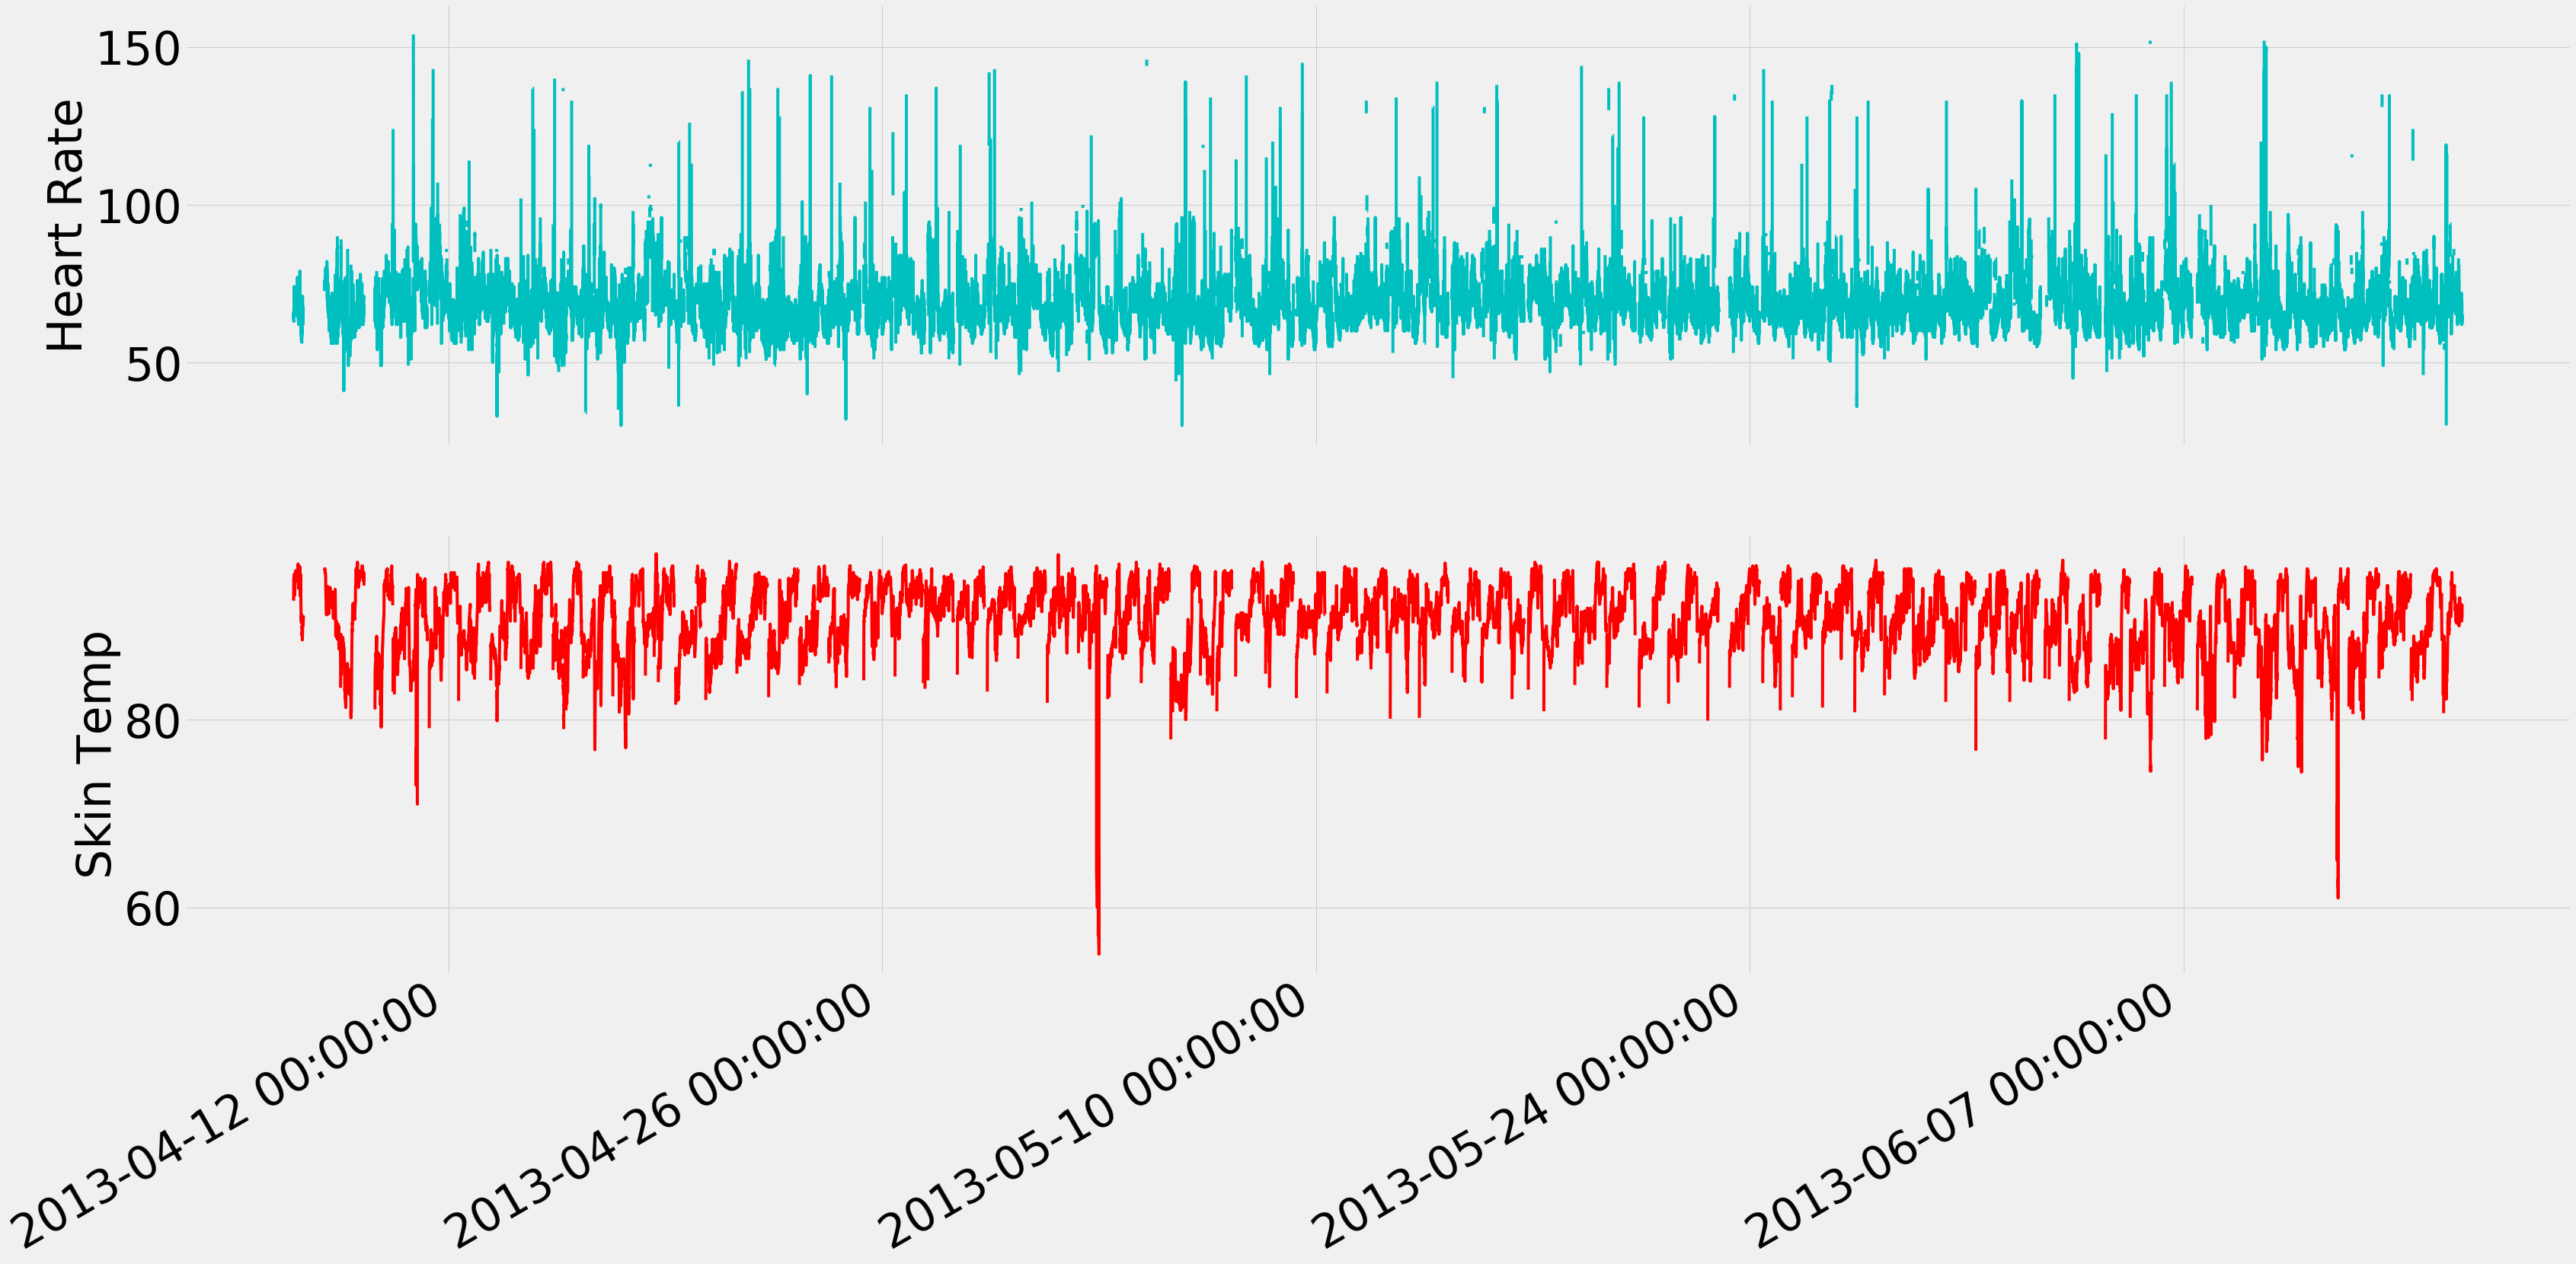

In [15]:
plt.style.use('fivethirtyeight')
plt.figure('rhythm', figsize=(50,26))
plt.subplot(211)
df_plot1 = heart_rate
df_plot1['date'] = pd.to_datetime(df_plot1['date'])
plt.tick_params(labelsize=60)
ax = plt.gca()
xfmt = mdate.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df_plot1['date'], df_plot1['value'], color='c')
plt.ylabel('Heart Rate',font)
plt.gcf().autofmt_xdate() 
plt.subplot(212)
df_plot2 = skin_temp
df_plot2['date'] = pd.to_datetime(df_plot2['date'])
plt.tick_params(labelsize=60)
ax = plt.gca()
xfmt = mdate.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df_plot2['date'], df_plot2['value'], color='r')
plt.ylabel('Skin Temp', font)
plt.gcf().autofmt_xdate() 
plt.savefig('rhythm.png', dpi=500)
#plt.show()

In [143]:
heart_rate_111 = heart_rate.interpolate()

C:\Users\yanru\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


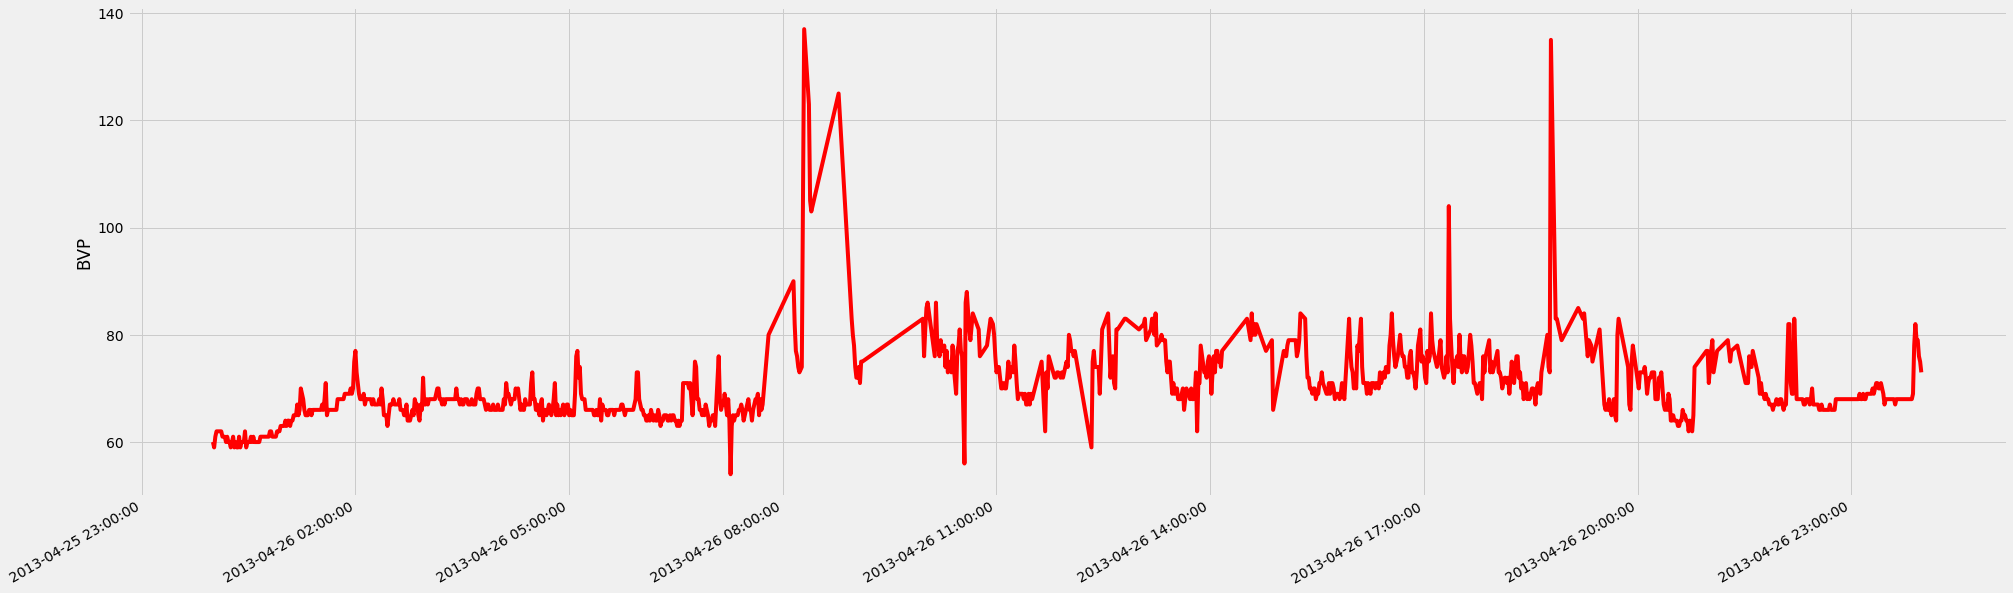

In [194]:
plt.style.use('fivethirtyeight')
plt.figure('BVP', figsize=(30,10))
df_plot = heart_rate_111[19 * 1440: 20 * 1440]
df_plot['date'] = pd.to_datetime(df_plot['date'])
ax = plt.gca()
xfmt = mdate.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df_plot['date'], df_plot['value'], color='r')
plt.ylabel('BVP')
plt.gcf().autofmt_xdate() 
plt.show()

In [73]:
heart_rate_interpolate = heart_rate.interpolate()

In [76]:
skin_temp_interpolate = skin_temp.interpolate()

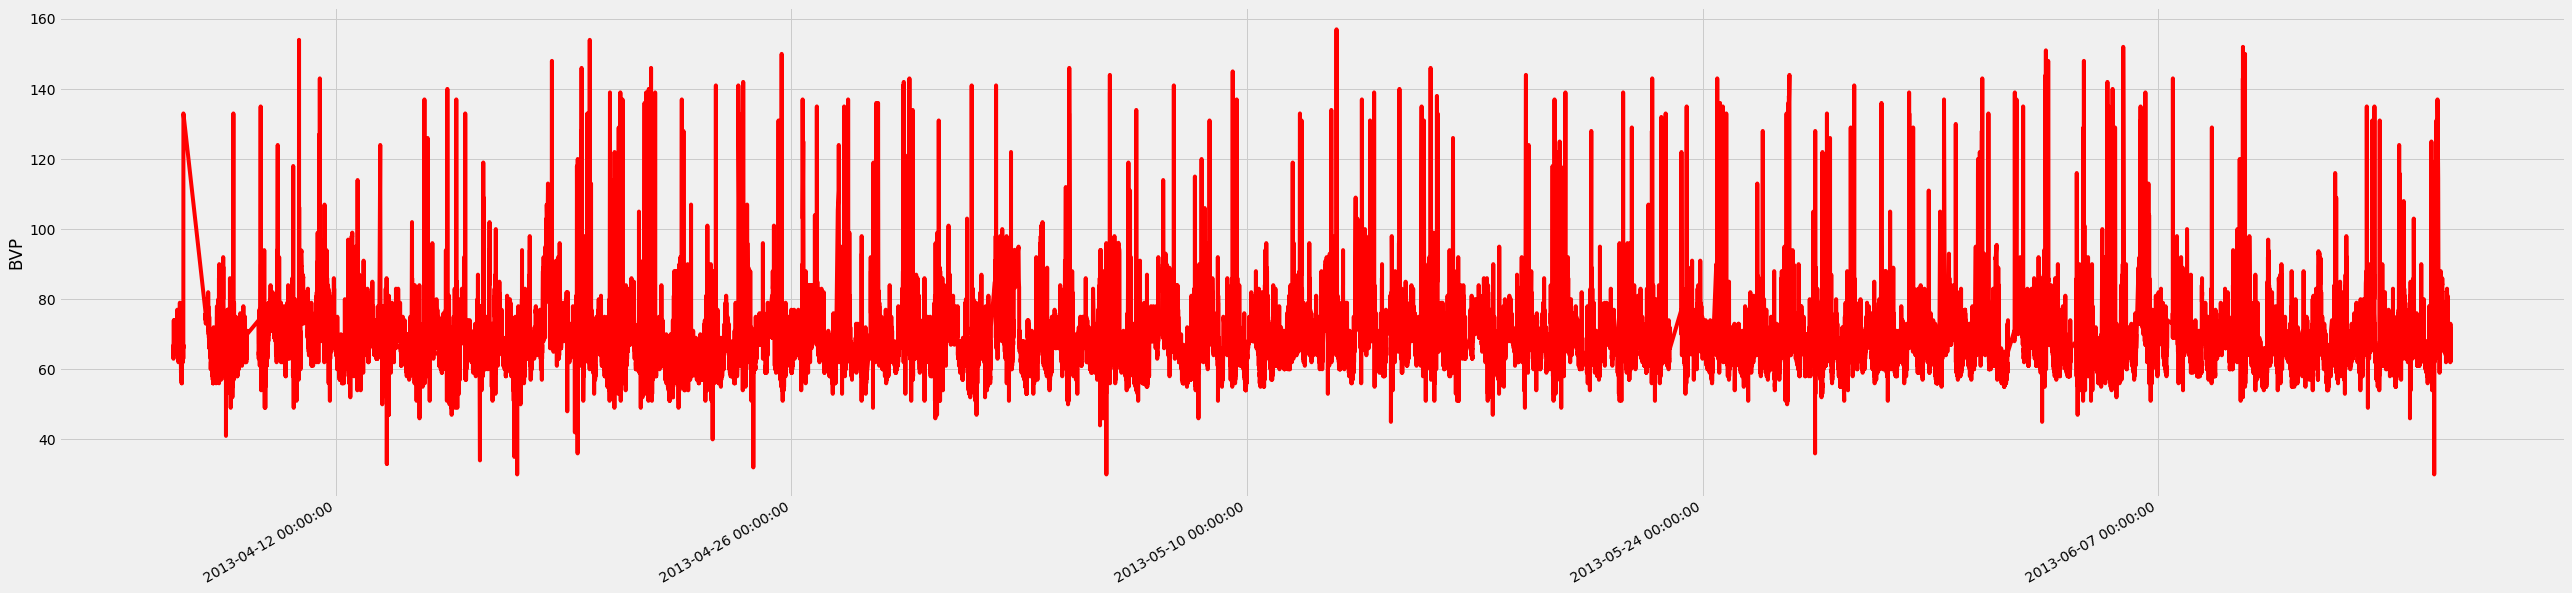

In [74]:
plt.style.use('fivethirtyeight')
plt.figure('BVP', figsize=(40,10))
df_plot = heart_rate_interpolate
df_plot['date'] = pd.to_datetime(df_plot['date'])
ax = plt.gca()
xfmt = mdate.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
plt.plot(df_plot['date'], df_plot['value'], color='r')
plt.ylabel('BVP')
plt.gcf().autofmt_xdate() 
plt.show()

In [75]:
heart_rate_interpolate.to_csv('heart_rate_interpolate' + '.txt', sep=',', header=True, index=False)

In [77]:
skin_temp_interpolate.to_csv('skin_temp_interpolate' + '.txt', sep=',', header=True, index=False)

In [248]:
os.chdir('C:\\Users\\yanru\\Desktop\\nf1')

In [254]:
#heart_rate_part = pd.read_csv('heart_rate_part.csv', sep=',')
skin_temp_part = pd.read_csv('skin_temp_day3.csv', sep=',')

In [241]:
for i in range(len(skin_temp_part)):
    print(skin_temp_part['value'][i])
    print(i)
    skin_temp_part['value'][i] = float(skin_temp_part['value'][i])

58.0
0
58.0
1
58.0
2
58.0
3


C:\Users\yanru\Anaconda2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


57.0
4
58.0
5
58.0
6
58.0
7
58.0
8
58.0
9
59.0
10
58.0
11
59.0
12
57.0
13
62.0
14
59.0
15
60.0
16
59.0
17
59.0
18
59.0
19
58.0
20
58.0
21
58.0
22
58.0
23
58.0
24
58.0
25
57.0
26
58.0
27
58.0
28
59.0
29
61.0
30
61.0
31
61.0
32
60.0
33
60.0
34
58.0
35
58.0
36
59.0
37
57.0
38
58.0
39
56.0
40
57.0
41
57.0
42
57.0
43
57.0
44
57.0
45
57.0
46
56.0
47
57.0
48
57.0
49
57.0
50
58.0
51
58.0
52
57.0
53
58.0
54
57.0
55
57.0
56
56.0
57
56.0
58
58.0
59
58.0
60
57.0
61
58.0
62
58.0
63
59.0
64
58.0
65
58.0
66
58.0
67
57.0
68
58.0
69
58.0
70
57.0
71
57.0
72
57.0
73
59.0
74
61.0
75
59.0
76
61.0
77
67.0
78
64.0
79
64.0
80
60.0
81
62.0
82
60.0
83
59.0
84
59.0
85
61.0
86
62.0
87
62.0
88
61.0
89
60.0
90
59.0
91
59.0
92
56.0
93
57.0
94
56.0
95
56.0
96
56.0
97
61.0
98
60.0
99
58.0
100
58.0
101
59.0
102
60.0
103
58.0
104
57.0
105
58.0
106
58.0
107
56.0
108
59.0
109
59.0
110
61.0
111
57.0
112
59.0
113
60.0
114
58.0
115
59.0
116
58.0
117
58.0
118
58.0
119
59.0
120
57.0
121
57.0
122
59.0
123
58.0
124
57.0
125
57.0

75.0
943
nan
944
nan
945
68.0
946
78.0
947
68.0
948
67.0
949
69.0
950
68.0
951
68.0
952
68.0
953
68.0
954
71.0
955
70.0
956
62.0
957
68.0
958
nan
959
75.0
960
69.0
961
67.0
962
66.0
963
68.0
964
66.0
965
68.0
966
67.0
967
68.0
968
66.0
969
65.0
970
65.0
971
66.0
972
65.0
973
64.0
974
64.0
975
64.0
976
68.0
977
70.0
978
69.0
979
72.0
980
75.0
981
nan
982
78.0
983
77.0
984
78.0
985
76.0
986
78.0
987
nan
988
73.0
989
82.0
990
85.0
991
85.0
992
87.0
993
87.0
994
85.0
995
82.0
996
79.0
997
nan
998
82.0
999
82.0
1000
85.0
1001
nan
1002
86.0
1003
nan
1004
nan
1005
nan
1006
nan
1007
83.0
1008
83.0
1009
82.0
1010
81.0
1011
81.0
1012
83.0
1013
83.0
1014
82.0
1015
85.0
1016
86.0
1017
86.0
1018
nan
1019
nan
1020
85.0
1021
83.0
1022
84.0
1023
85.0
1024
86.0
1025
86.0
1026
81.0
1027
81.0
1028
77.0
1029
nan
1030
75.0
1031
74.0
1032
76.0
1033
72.0
1034
70.0
1035
71.0
1036
74.0
1037
74.0
1038
nan
1039
nan
1040
nan
1041
82.0
1042
81.0
1043
64.0
1044
64.0
1045
nan
1046
72.0
1047
83.0
1048
85.0
1049
nan
1

In [255]:
#heart_rate_part_interpolate = heart_rate_part.interpolate()
skin_temp_part_interpolate = skin_temp_part.interpolate()

In [256]:
#heart_rate_part_interpolate.to_csv('heart_rate_part_interpolate.csv', sep=',', header=True, index=False)
skin_temp_part_interpolate.to_csv('skin_temp_day4.csv', sep=',', header=True, index=False)